In [883]:
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

from __future__ import division

In [960]:
exp1 = np.fromfile('/home/sergey/Documents/exp_cx1.dat',dtype=float,count=-1, sep=" ")
th1 = np.fromfile('/home/sergey/Documents/th1.txt',dtype=float,count=-1, sep=" ")
th2 = np.fromfile('/home/sergey/Documents/th2.txt',dtype=float,count=-1, sep=" ")
th3 = np.fromfile('/home/sergey/Documents/th3.txt',dtype=float,count=-1, sep=" ")

In [961]:
exp1.shape


(10804,)

In [962]:
th1.shape

(120,)

In [996]:
exp1 = np.reshape(exp1, (2701,-1 ))
exp1.ndim
exp1.shape
exp1[0,2]
expt=[]
expt = exp1[1500:2200,1]
    
#for i in xrange (0,2701):
  #  if 1+10/7*exp1[i,0]>0: 
 #   exp1[i,0]=np.sqrt(1+10/7*exp1[i,0])-1
  #  else: 
   #     exp1[i,0]=exp1[i,0]-0.5 
        
            

In [997]:
expt.shape

(700,)

In [998]:
th1 = np.reshape(th1, (120,-1 ))
th1.ndim
th1.shape
th2 = np.reshape(th2, (120,-1 ))
th3 = np.reshape(th3, (120,-1 ))

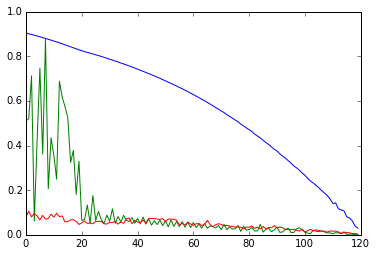

In [999]:
plt.plot(th1/100)
plt.plot(th2*1)
plt.plot(th3*1)
plt.savefig('/home/sergey/Documents/111', format='pdf')

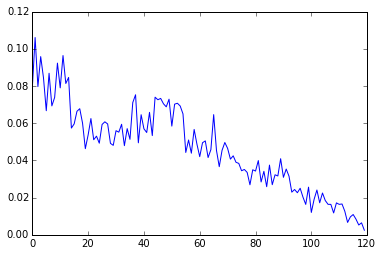

In [1000]:
plt.plot(th3)

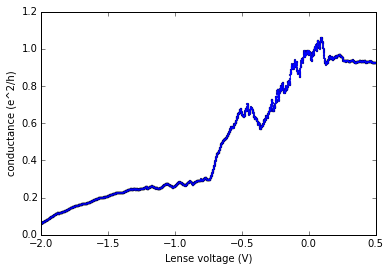

In [1001]:
plt.plot(exp1[:,0],exp1[:,1]/0.001*25800/0.25, 'bo',mew=0.2, ms=2)
plt.plot(exp1[:,0],exp1[:,1]/0.001*25800/0.25)
#plt.plot(th1[:,0],th1[:,1]/0.001*25800/0.25, 'r',mew=0.3, ms=3)
plt.xlabel("Lense voltage (V)")
plt.ylabel("conductance (e^2/h)")
plt.xlim(-2,0.5)
#plt.ylim(0.38,1.1)
plt.savefig('/home/sergey/Documents/pl1', format='pdf')


## 

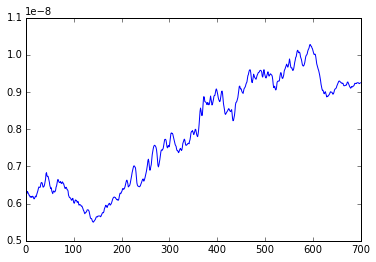

In [1002]:
plt.plot(expt)

In [1003]:
from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in xrange(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [1004]:
dat=baseline_als(expt,10,0.1,10)

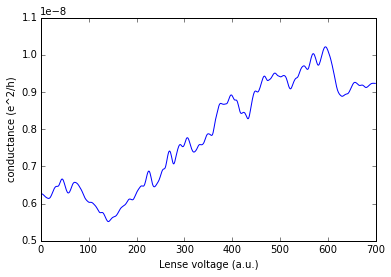

In [1005]:
plt.plot(dat,mew=0.2, ms=2)
plt.xlabel("Lense voltage (a.u.)")
plt.ylabel("conductance (e^2/h)")
#plt.xlim(0,2700)
#plt.ylim(0.38,1.1)
plt.savefig('/home/sergey/Documents/pl2', format='pdf')

In [1006]:
expt=expt-dat

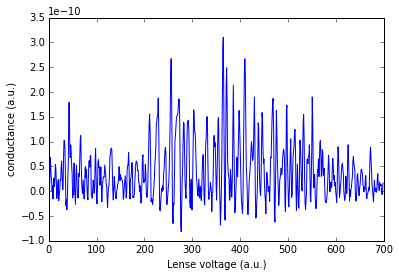

In [1007]:
plt.plot(expt)
plt.xlabel("Lense voltage (a.u.)")
plt.ylabel("conductance (a.u.)")
#plt.xlim(0,2600)
#plt.ylim(0.38,1.1)
plt.savefig('/home/sergey/Documents/pl3', format='pdf')

In [1008]:
expt.shape

(700,)

In [ ]:
widths = np.arange(1, 100, 0.25)
sig = fbm_s
w_coefs_bwn = signal.cwt(sig, signal.ricker, widths)
w_coefs_bwn_la = -1 * log(abs(w_coefs_bwn))

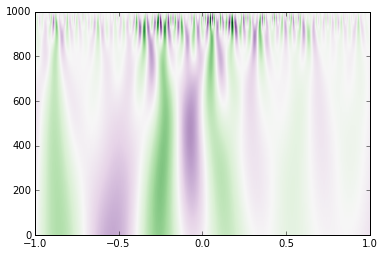

In [1009]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 500, 1, endpoint=False)
sig = expt
widths = np.arange(1, 50)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 1000], cmap='PRGn', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

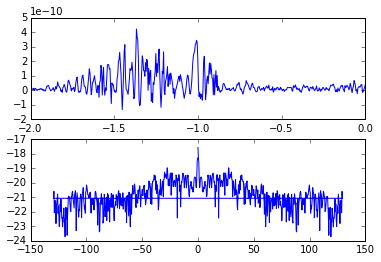

In [936]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi
t = scipy.linspace(-2,0.7,701)


signal = expt

FFT = abs(scipy.fft(signal))
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])

pylab.subplot(211)
pylab.plot(t, signal)
plt.xlim(-2,0,7)
pylab.subplot(212)
pylab.plot(freqs,np.log(FFT))

plt.savefig('/home/sergey/Documents/pl5', format='pdf')

